# Model Comparisons

Now that we have attained the models trained on the training set, we must compare the performance of these models on the test set. First we import some necessary libraries.

In [1]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

## 1. Retrieve Results

Each model has a list of predictions for the test set where they give their respective probabilities of the review being positive. We read each list of probabilities in and store them in an array. The csvs can be found in the 'results' folder.

In [2]:
lda200k_combined_df = pd.read_csv('pred_probs_combined_50k.csv')
lda200k_summaries_df = pd.read_csv('pred_probs_summaries_50k.csv')

w2v200k_combined_df = pd.read_csv('combined_proba_results.csv')
w2v200k_summaries_df = pd.read_csv('summary_proba_results.csv')

In [3]:
w2v200k_combined = w2v200k_combined_df['1']
w2v200k_summaries = w2v200k_summaries_df['1']

In [4]:
lda200k_combined = lda200k_combined_df['Probability of positive']
lda200k_summaries = lda200k_summaries_df['Probability of positive']

## 2. Retrieve test labels

As topic modelling is an unsupervised process, we have to load the test dataset with the sentiment scores (score of 0 is a negative review, score of 1 is a positive review).

In [5]:
test_df = pd.read_csv('test_sentiments_50k.csv')
test = test_df['sentiment']

As shown below, the summaries probability csv produced by the word2vec model has less rows than expected. This is because of how the model was designed. Words with frequency below 3 in the corpus are removed hence as two of the summaries contained only one word and these words had a frequency below 3, the whole row was deleted. In order to allow us to compare the probabilities to the test set, we created a separate test set which also had these rows removed. In hindsight, it may have been better practice to note down the index of the removed rows and then remove these rows from the test set for the LDA model also.

In [7]:
w2v200k_summaries.shape

(49471,)

Below is the test set for the word2vec model ran on the summaries.

In [8]:
ytest_df = pd.read_csv('y_test_summary.csv')
ytest = ytest_df['sentiment']

## 3. Producing curves

We now take the probabilities produced by the models and produce the ROC based on these values and the true values stored in "test".

Here, we generate the points for the ROC curves using the "roc_curve" function in the sk-learn "metrics" package.

In [9]:
from sklearn.metrics import roc_curve
lda_200k_combined_fpr, lda_200k_combined_tpr, _ = roc_curve(test, lda200k_combined)
lda_200k_summaries_fpr, lda_200k_summaries_tpr, _ = roc_curve(test, lda200k_summaries)

w2v_200k_combined_fpr, w2v_200k_combined_tpr, _ = roc_curve(test, w2v200k_combined)
w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, _ = roc_curve(ytest, w2v200k_summaries)

### 3.1 Main Comparison

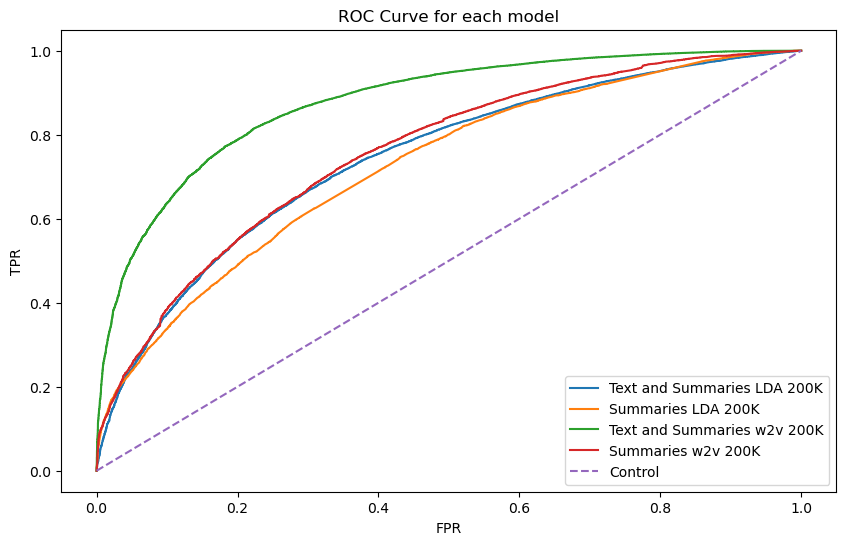

In [10]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA 200K')
plt.plot(lda_200k_summaries_fpr, lda_200k_summaries_tpr, label='Summaries LDA 200K')
plt.plot(w2v_200k_combined_fpr, w2v_200k_combined_tpr, label='Text and Summaries w2v 200K')
plt.plot(w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, label='Summaries w2v 200K')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

### 3.2 ROC curve zoomed into the top right corner

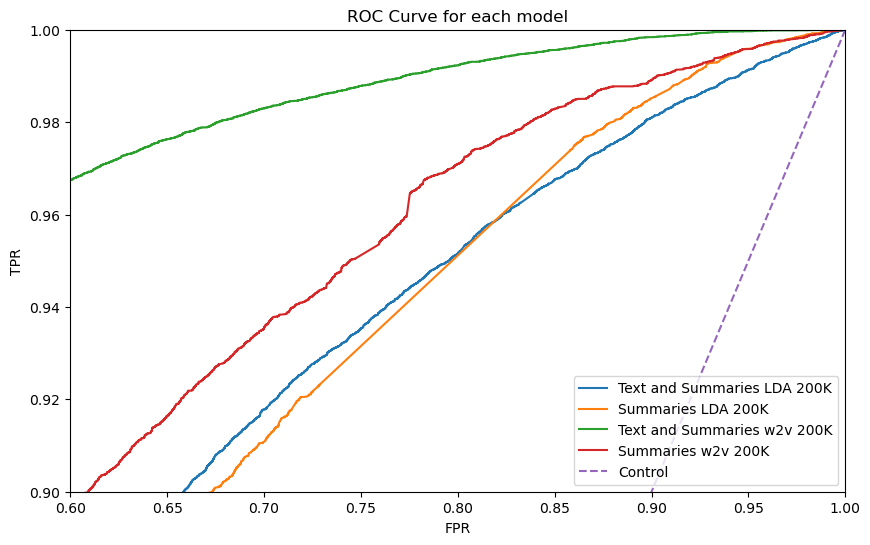

In [11]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA 200K')
plt.plot(lda_200k_summaries_fpr, lda_200k_summaries_tpr, label='Summaries LDA 200K')
plt.plot(w2v_200k_combined_fpr, w2v_200k_combined_tpr, label='Text and Summaries w2v 200K')
plt.plot(w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, label='Summaries w2v 200K')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.axis([0.6,1,0.9,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()


### 3.3 ROC curve zoomed into the origin

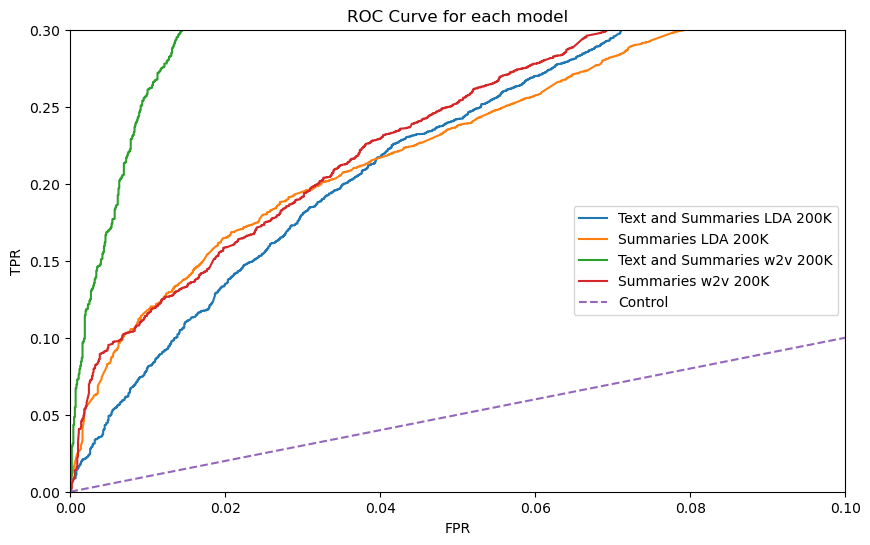

In [12]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA 200K')
plt.plot(lda_200k_summaries_fpr, lda_200k_summaries_tpr, label='Summaries LDA 200K')
plt.plot(w2v_200k_combined_fpr, w2v_200k_combined_tpr, label='Text and Summaries w2v 200K')
plt.plot(w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, label='Summaries w2v 200K')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.axis([0,0.1,0,0.3])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

We can see that the word2vec model on the combined text and summaries is outperforming the other models on all regions of the ROC curve. This confirms that it is the best model. However, we can see that some of the other curves have overlapping segments, and due to our dataset being highly unbalanced, this could mean the one that seems to outperform on the ROC, is in fact not the best. Since we are giving no higher priority to either predicting positives or negatives correctly, we can look at the F1 score and use that as our final metric. The [F1 Score](https://hippocampus-garden.com/f1/) is the harmonic mean between precision and recall, and we will plot it below.

### 3.4 F1-Threshold Curve

In [13]:
from sklearn.metrics import precision_recall_curve
lda_200k_combined_pre, lda_200k_combined_rec, lda_200k_combined_thr = precision_recall_curve(test, lda200k_combined)
lda_200k_summaries_pre, lda_200k_summaries_rec, lda_200k_summaries_thr = precision_recall_curve(test, lda200k_summaries)
w2v_200k_combined_pre, w2v_200k_combined_rec, w2v_200k_combined_thr = precision_recall_curve(test, w2v200k_combined)
w2v_200k_summaries_pre, w2v_200k_summaries_rec, w2v_200k_summaries_thr = precision_recall_curve(ytest, w2v200k_summaries)

In [14]:
def get_f1(pre,rec):
    return 2*(pre*rec)/(pre+rec)

In [15]:
lda_200k_combined_f1=get_f1(lda_200k_combined_pre,lda_200k_combined_rec)
lda_200k_summaries_f1=get_f1(lda_200k_summaries_pre,lda_200k_summaries_rec)
w2v_200k_combined_f1=get_f1(w2v_200k_combined_pre,w2v_200k_combined_rec)
w2v_200k_summaries_f1=get_f1(w2v_200k_summaries_pre,w2v_200k_summaries_rec)

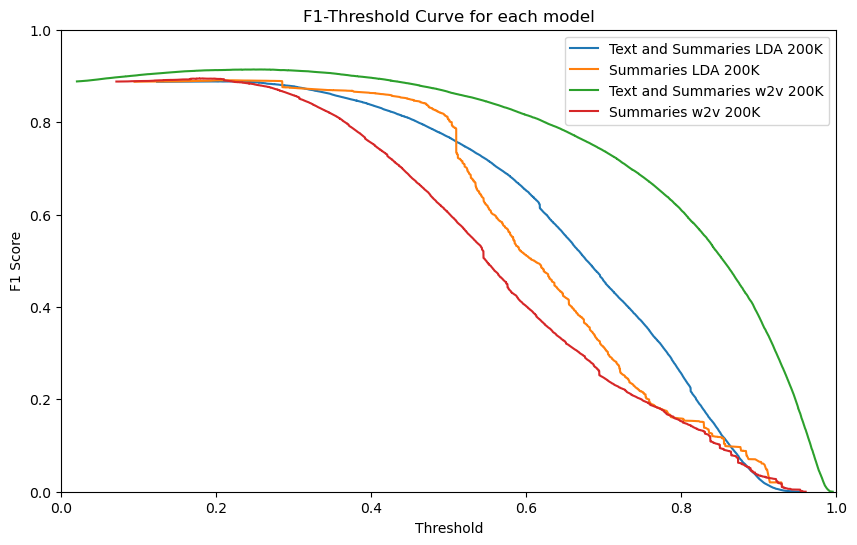

In [16]:
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_thr, lda_200k_combined_f1[0:len(lda_200k_combined_f1)-1], label='Text and Summaries LDA 200K')
plt.plot(lda_200k_summaries_thr, lda_200k_summaries_f1[0:len(lda_200k_summaries_f1)-1], label='Summaries LDA 200K')
plt.plot(w2v_200k_combined_thr, w2v_200k_combined_f1[0:len(w2v_200k_combined_f1)-1], label='Text and Summaries w2v 200K')
plt.plot(w2v_200k_summaries_thr, w2v_200k_summaries_f1[0:len(w2v_200k_summaries_f1)-1], label='Summaries w2v 200K')

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1-Threshold Curve for each model')
plt.legend()
plt.axis([0,1,0,1])
plt.show()

We would want to choose a threshold for a particular model to maximise its F1 score. Interestingly, with LDA, the summaries and combined models would give very similar results, meaning that under our criteria, we say they have approximately the same success.

### 3.5 LDA Full Dataset Results

We did manage to run the LDA model on the full dataset, for the combined text and summaries, although did not have much time left over to fully analyse the results. Here we load in the prediction probabilities produced using the full dataset, and the full test sentiments to go with it.

In [17]:
test_full_df = pd.read_csv('reviews_test_with_sentiment.csv')
test_full = test_full_df['sentiment']

In [18]:
combined_df150 = pd.read_csv('pred_probs_combined150.csv')
combined150 = combined_df150['Probability of positive']
combined_fpr150, combined_tpr150, _ = roc_curve(test_full, combined150)

Here is an ROC curve plotted for these results in comparison to the 200k training set results.

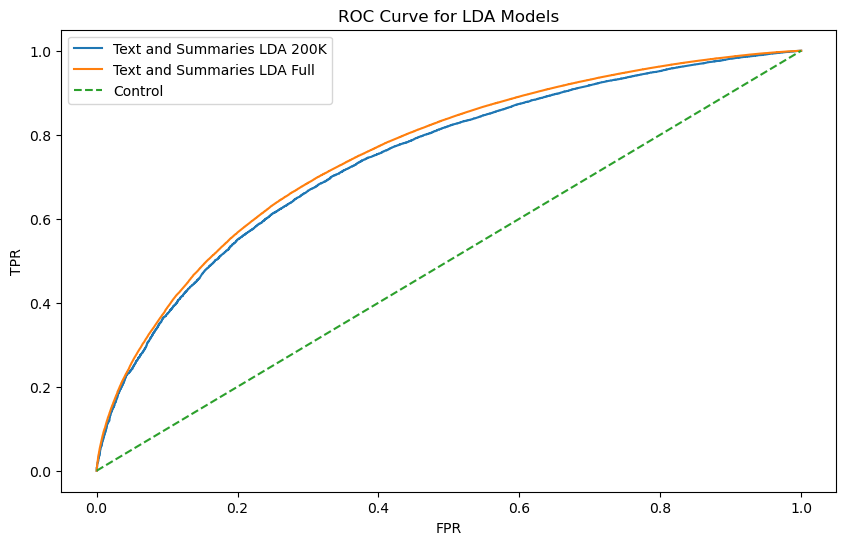

In [19]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA 200K')
plt.plot(combined_fpr150, combined_tpr150, label='Text and Summaries LDA Full')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for LDA Models')
plt.legend()
plt.show()

We can see that the combined text and summary results have been slightly improved, but not enough to reach the standard of the word2vec. We may have prevously thought that there would have been more of an improvement, so this is an interesting result to note. 